In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Get all the data

In [22]:
!ls ../cleaned_data/

Education_Equity.csv               income_level_and_financial_aid.csv
Enrollment_and_Degrees_Awarded.csv institution_location.csv
Ethnic_and_Gender_Enrollment.csv   institution_type_new.csv
Final_Education_Fairness.csv       institutional_type_list.csv
Financial_F1.csv                   match_features_all_z.csv
Financial_F2.csv                   match_features_key_z.csv
Financial_F3.csv                   match_label.csv
budget_eval.csv


In [23]:
df = pd.read_csv("../cleaned_data/match_features_key_z.csv")
df.drop(columns=["ACT Math 75th percentile score"], inplace=True)

In [24]:
df.columns

Index(['Unnamed: 0', 'unitid', 'year', 'Enrolled total', 'Applicants total',
       'Admissions total', 'Secondary school GPA', 'Secondary school rank',
       'Total employees', 'Sector of institution', 'Institutional category',
       'Level of institution', 'Control of institution',
       'SAT Evidence-Based Reading and Writing 25th percentile score',
       'SAT Evidence-Based Reading and Writing 75th percentile score',
       'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
       'ACT Composite 25th percentile score',
       'ACT Composite 75th percentile score',
       'ACT English 25th percentile score',
       'ACT English 75th percentile score', 'ACT Math 25th percentile score'],
      dtype='object')

In [25]:
def missing_info(df):
    print('data dimensions:',df.shape)
    perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0] 
    print('fraction of missing values in features:') 
    print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
    print('data types of the features with missing values:') 
    print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes) 
    frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0] 
    print('fraction of points with missing values:',frac_missing)

In [26]:
missing_info(df)

data dimensions: (14372, 22)
fraction of missing values in features:
Enrolled total                                                  0.012524
Admissions total                                                0.010228
Total employees                                                 0.144587
SAT Evidence-Based Reading and Writing 25th percentile score    0.428611
SAT Evidence-Based Reading and Writing 75th percentile score    0.428611
SAT Math 25th percentile score                                  0.427707
SAT Math 75th percentile score                                  0.427707
ACT Composite 25th percentile score                             0.411355
ACT Composite 75th percentile score                             0.411355
ACT English 25th percentile score                               0.452407
ACT English 75th percentile score                               0.452407
ACT Math 25th percentile score                                  0.452199
dtype: float64
data types of the features with missing 

In [27]:
df1 = df.dropna()

In [28]:
df1["Control of institution"].value_counts()

Private not-for-profit    3942
Public                    2503
Private for-profit          23
Name: Control of institution, dtype: int64

In [29]:
onehot_ftrs = ["Secondary school GPA", "Secondary school rank", 
               "Sector of institution", "Institutional category",
               "Level of institution", "Control of institution"]  # 6
num_ftrs = ['Enrolled total', 'Applicants total','Admissions total', 'Total employees',
       'SAT Evidence-Based Reading and Writing 25th percentile score',
       'SAT Evidence-Based Reading and Writing 75th percentile score',
       'SAT Math 25th percentile score', 
        'SAT Math 75th percentile score',
       'ACT Composite 25th percentile score',
       'ACT Composite 75th percentile score',
       'ACT English 25th percentile score',
       'ACT English 75th percentile score', 
        'ACT Math 25th percentile score']   # 13
len(num_ftrs)  # removed: year, unitid, unnamed

13

In [30]:
data_compressed = {"unitid": []}
for ftr in onehot_ftrs + num_ftrs:
    data_compressed[ftr] = []

In [31]:
df_gp = df1.groupby("unitid")
for idx, gp in df_gp:
    data_compressed["unitid"].append(idx)
    for ftr in onehot_ftrs:
        data_compressed[ftr].append(list(gp[ftr])[0])
    for ftr in num_ftrs:
        data_compressed[ftr].append(gp[ftr].mean())
# data_compressed

In [32]:
df_compressed = pd.DataFrame(data=data_compressed)
df_compressed

,unitid,Secondary school GPA,Secondary school rank,Sector of institution,Institutional category,Level of institution,Control of institution,Enrolled total,Applicants total,Admissions total,Total employees,SAT Evidence-Based Reading and Writing 25th percentile score,SAT Evidence-Based Reading and Writing 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,ACT English 25th percentile score,ACT English 75th percentile score,ACT Math 25th percentile score
0,100654,Required,Recommended,"Public, 4-year or above","Degree-granting, primarily baccalaureate or above",Four or more years,Public,0.557085,0.327013,0.860360,-0.091936,-1.368555,-1.606542,-1.471942,-1.481415,-1.225743,-1.798764,-1.247204,-1.419541,-1.149949
1,100663,Required,Neither required nor recommended,"Public, 4-year or above","Degree-granting, primarily baccalaureate or above",Four or more years,Public,0.999848,0.304023,0.646120,3.275413,0.074830,0.595705,0.236267,0.916296,0.222678,0.706550,0.514687,1.098761,0.073799
2,100706,Required,Recommended,"Public, 4-year or above","Degree-granting, primarily baccalaureate or above",Four or more years,Public,0.387489,-0.076666,0.109952,0.129473,0.775968,1.143184,0.586669,1.309983,1.008964,1.277938,1.065278,1.549800,1.122726
3,100724,Required,Neither required nor recommended,"Public, 4-year or above","Degree-granting, primarily baccalaureate or above",Four or more years,Public,0.175305,0.214337,0.547498,-0.070114,-1.300040,-1.653398,-1.425952,-1.517002,-1.308510,-1.710858,-1.210498,-1.532301,-1.237360
4,100751,Required,Recommended,"Public, 4-year or above","Degree-granting, primarily baccalaureate or above",Four or more years,Public,4.700586,3.193551,4.113828,2.131623,0.280375,0.452670,0.170566,0.531505,0.553746,1.365844,0.698218,1.512214,0.467146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,488785,Required,Considered but not required,"Private not-for-profit, 4-year or above","Degree-granting, primarily baccalaureate or above",Four or more years,Private not-for-profit,-0.573637,-0.526669,-0.602956,-0.430476,-0.532671,-0.842044,-0.214876,-0.560587,-0.894675,-1.315282,-0.806731,-1.194022,-0.494370
1294,489937,Required,Neither required nor recommended,"Private not-for-profit, 4-year or above","Degree-granting, primarily baccalaureate or above",Four or more years,Private not-for-profit,-0.552091,-0.502461,-0.593793,-0.403012,-1.375407,-0.971516,-1.417192,-1.031010,-1.267127,-1.710858,-1.247204,-1.532301,-0.953276
1295,490179,Considered but not required,Considered but not required,"Private for-profit, 4-year or above","Degree-granting, not primarily baccalaureate o...",Four or more years,Private for-profit,-0.486697,-0.481196,-0.561915,-0.450792,-0.930058,-0.509118,0.192466,-0.313699,-2.136180,-1.315282,-0.806731,-1.645061,0.423441
1296,490805,Required,Neither required nor recommended,"Public, 4-year or above","Degree-granting, primarily baccalaureate or above",Four or more years,Public,0.269868,-0.044029,-0.313621,0.044697,-0.279165,-0.546110,-0.300286,-0.547242,-0.460149,-0.326342,-0.366259,-0.404703,-0.428812


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [34]:
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:-1]:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name

In [35]:
preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
                  ('std', StandardScaler(), num_ftrs)
                 ])

clf = Pipeline(steps=[('preprocessor', preprocessor)])
data_prep = clf.fit_transform(df_compressed)
df_prep = pd.DataFrame(data_prep, columns=get_column_names_from_ColumnTransformer(preprocessor))
df_prep["unitid"] = df_compressed["unitid"]

In [36]:
df_prep

,x0_Considered but not required,x0_Neither required nor recommended,x0_Recommended,x0_Required,x1_Considered but not required,x1_Neither required nor recommended,x1_Recommended,x1_Required,"x2_Private for-profit, 2-year","x2_Private for-profit, 4-year or above",...,SAT Evidence-Based Reading and Writing 25th percentile score,SAT Evidence-Based Reading and Writing 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,ACT English 25th percentile score,ACT English 75th percentile score,ACT Math 25th percentile score,unitid
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.385720,-1.641833,-1.475984,-1.488243,-1.219798,-1.808154,-1.239556,-1.409820,-1.163826,100654
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.185879,0.735750,0.349166,1.048921,0.290945,0.787513,0.563334,1.162411,0.108232,100663
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.949299,1.326818,0.723556,1.465505,1.111063,1.379507,1.126737,1.623109,1.198568,100706
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.311119,-1.692420,-1.426845,-1.525900,-1.306126,-1.717078,-1.201996,-1.524995,-1.254688,100724
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.409683,0.581327,0.278968,0.641751,0.636258,1.470583,0.751135,1.584717,0.517108,100751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.475585,-0.816469,-0.132861,-0.513859,-0.874485,-1.307236,-0.788834,-1.179471,-0.482366,488785
1294,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.393180,-0.956248,-1.417485,-1.011642,-1.262962,-1.717078,-1.239556,-1.524995,-0.959388,489937
1295,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.908272,-0.457035,0.302367,-0.252611,-2.169407,-1.307236,-0.788834,-1.640169,0.471677,490179
1296,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.199560,-0.496972,-0.224118,-0.499738,-0.421262,-0.282630,-0.338111,-0.373249,-0.414220,490805


In [37]:
df_type = pd.read_csv("../cleaned_data/institutional_type_list.csv").drop_duplicates()
# df_type["unitid"].value_counts().to_list()
df_prep = df_prep.merge(df_type, on="unitid", how = "left")

In [38]:
df_prep["institution_type"].value_counts()

private_nonprofit    819
public_nonprofit     445
Name: institution_type, dtype: int64

In [39]:
df_prep

,x0_Considered but not required,x0_Neither required nor recommended,x0_Recommended,x0_Required,x1_Considered but not required,x1_Neither required nor recommended,x1_Recommended,x1_Required,"x2_Private for-profit, 2-year","x2_Private for-profit, 4-year or above",...,SAT Math 25th percentile score,SAT Math 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,ACT English 25th percentile score,ACT English 75th percentile score,ACT Math 25th percentile score,unitid,Unnamed: 0,institution_type
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.475984,-1.488243,-1.219798,-1.808154,-1.239556,-1.409820,-1.163826,100654,0.0,public_nonprofit
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.349166,1.048921,0.290945,0.787513,0.563334,1.162411,0.108232,100663,1.0,public_nonprofit
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.723556,1.465505,1.111063,1.379507,1.126737,1.623109,1.198568,100706,2.0,public_nonprofit
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.426845,-1.525900,-1.306126,-1.717078,-1.201996,-1.524995,-1.254688,100724,3.0,public_nonprofit
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.278968,0.641751,0.636258,1.470583,0.751135,1.584717,0.517108,100751,5.0,public_nonprofit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.132861,-0.513859,-0.874485,-1.307236,-0.788834,-1.179471,-0.482366,488785,3977.0,private_nonprofit
1294,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.417485,-1.011642,-1.262962,-1.717078,-1.239556,-1.524995,-0.959388,489937,3958.0,private_nonprofit
1295,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.302367,-0.252611,-2.169407,-1.307236,-0.788834,-1.640169,0.471677,490179,NaN,NaN
1296,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.224118,-0.499738,-0.421262,-0.282630,-0.338111,-0.373249,-0.414220,490805,1998.0,public_nonprofit


### TSNE and visualization

In [40]:
# TSNE for visualization
from sklearn.manifold import TSNE
# !pip install colorcet
import colorcet as cc

In [52]:
tsne_train = df_prep.drop(columns=["unitid"]).dropna()

In [53]:
hue = tsne_train["institution_type"].values
tsne_train.drop(columns=["institution_type"], inplace=True)

In [54]:
tsne_train

,x0_Considered but not required,x0_Neither required nor recommended,x0_Recommended,x0_Required,x1_Considered but not required,x1_Neither required nor recommended,x1_Recommended,x1_Required,"x2_Private for-profit, 2-year","x2_Private for-profit, 4-year or above",...,SAT Evidence-Based Reading and Writing 25th percentile score,SAT Evidence-Based Reading and Writing 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,ACT English 25th percentile score,ACT English 75th percentile score,ACT Math 25th percentile score,Unnamed: 0
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.385720,-1.641833,-1.475984,-1.488243,-1.219798,-1.808154,-1.239556,-1.409820,-1.163826,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.185879,0.735750,0.349166,1.048921,0.290945,0.787513,0.563334,1.162411,0.108232,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.949299,1.326818,0.723556,1.465505,1.111063,1.379507,1.126737,1.623109,1.198568,2.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.311119,-1.692420,-1.426845,-1.525900,-1.306126,-1.717078,-1.201996,-1.524995,-1.254688,3.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.409683,0.581327,0.278968,0.641751,0.636258,1.470583,0.751135,1.584717,0.517108,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.535266,-0.643408,-0.469811,-0.582113,-0.529172,-0.624165,-0.601033,-0.718773,-0.618658,3927.0
1293,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.475585,-0.816469,-0.132861,-0.513859,-0.874485,-1.307236,-0.788834,-1.179471,-0.482366,3977.0
1294,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.393180,-0.956248,-1.417485,-1.011642,-1.262962,-1.717078,-1.239556,-1.524995,-0.959388,3958.0
1296,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.199560,-0.496972,-0.224118,-0.499738,-0.421262,-0.282630,-0.338111,-0.373249,-0.414220,1998.0


In [79]:
tsne_train.columns

Index(['x0_Considered but not required', 'x0_Neither required nor recommended',
       'x0_Recommended', 'x0_Required', 'x1_Considered but not required',
       'x1_Neither required nor recommended', 'x1_Recommended', 'x1_Required',
       'x2_Private for-profit, 2-year',
       'x2_Private for-profit, 4-year or above',
       'x2_Private not-for-profit, 2-year',
       'x2_Private not-for-profit, 4-year or above', 'x2_Public, 2-year',
       'x2_Public, 4-year or above',
       'x3_Degree-granting, associate's and certificates',
       'x3_Degree-granting, not primarily baccalaureate or above',
       'x3_Degree-granting, primarily baccalaureate or above',
       'x3_Nondegree-granting, sub-baccalaureate',
       'x4_At least 2 but less than 4 years', 'x4_Four or more years',
       'x5_Private for-profit', 'x5_Private not-for-profit', 'x5_Public',
       'Enrolled total', 'Applicants total', 'Admissions total',
       'Total employees',
       'SAT Evidence-Based Reading and Writing 

In [81]:
tsne_new = tsne_train[['x0_Considered but not required', 'x0_Neither required nor recommended',
       'x0_Recommended', 'x0_Required', 'x1_Considered but not required',
       'x1_Neither required nor recommended', 'x1_Recommended', 'x1_Required',
       'x3_Degree-granting, associate\'s and certificates',
       'x3_Degree-granting, not primarily baccalaureate or above',
       'x3_Degree-granting, primarily baccalaureate or above',
       'x3_Nondegree-granting, sub-baccalaureate',
       'x4_At least 2 but less than 4 years', 'x4_Four or more years',
       'x5_Private for-profit', 'x5_Private not-for-profit', 'x5_Public',
       'Enrolled total', 'Applicants total', 'Admissions total',
       'Total employees',
       'SAT Evidence-Based Reading and Writing 25th percentile score',
       'SAT Evidence-Based Reading and Writing 75th percentile score',
       'SAT Math 25th percentile score', 'SAT Math 75th percentile score',
       'ACT Composite 25th percentile score',
       'ACT Composite 75th percentile score',
       'ACT English 25th percentile score',
       'ACT English 75th percentile score', 'ACT Math 25th percentile score']]

[Text(0.5, 1.0, 'Institution Features T-SNE Projection to 2D Space')]

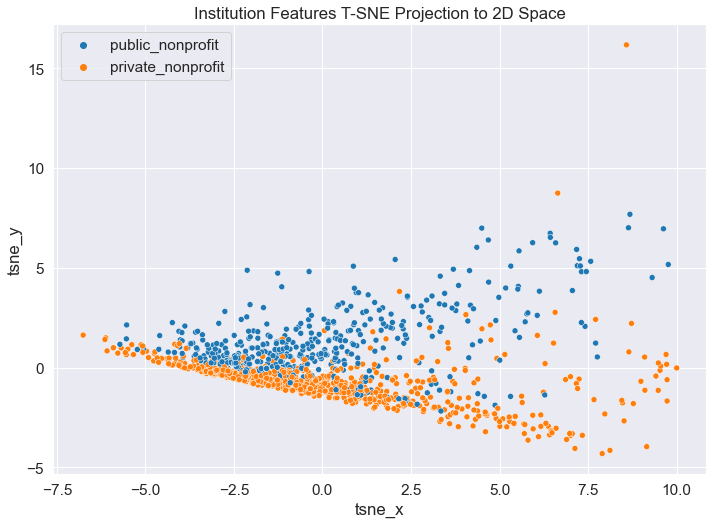

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #, perplexity=20)
z = pca.fit_transform(tsne_new) 

df_clustered = pd.DataFrame()
df_clustered["tsne_x"] = z[:,0]
df_clustered["tsne_y"] = z[:,1]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.4)
sns.scatterplot(x="tsne_x", y="tsne_y", hue=hue,
                palette=sns.color_palette("tab10", 2),
                data=df_clustered).set(title="Institution Features T-SNE Projection to 2D Space")



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1264 samples in 0.002s...
[t-SNE] Computed neighbors for 1264 samples in 0.119s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1264
[t-SNE] Computed conditional probabilities for sample 1264 / 1264
[t-SNE] Mean sigma: 0.673768
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.785236
[t-SNE] KL divergence after 1000 iterations: 0.653890


[Text(0.5, 1.0, 'Institution Features T-SNE Projection to 2D Space')]

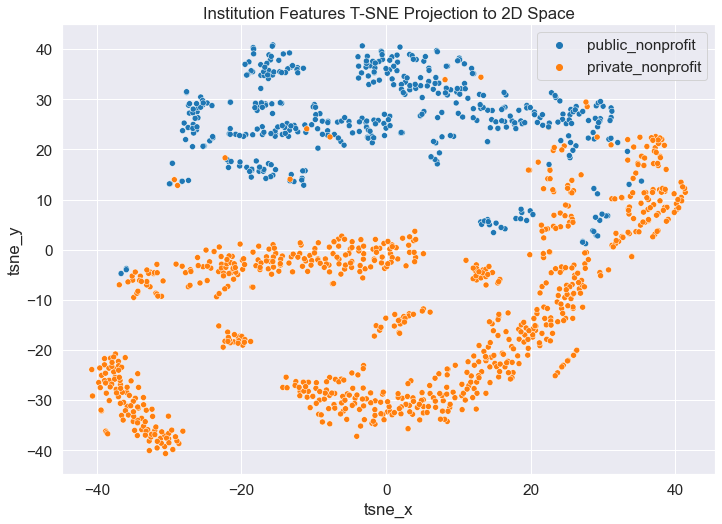

In [83]:
tsne = TSNE(n_components=2, verbose=1, random_state=123) #, perplexity=20)
z = tsne.fit_transform(tsne_new) 

df_clustered = pd.DataFrame()
df_clustered["tsne_x"] = z[:,0]
df_clustered["tsne_y"] = z[:,1]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.4)
sns.scatterplot(x="tsne_x", y="tsne_y", hue=hue,
                palette=sns.color_palette("tab10", 2),
                data=df_clustered).set(title="Institution Features T-SNE Projection to 2D Space")


## Kmeans clustering

In [85]:
# for public
# df_pub = df_prep[df_prep["institution_type"] == "Public"]
df_prep.dropna(inplace=True)
train = df_prep.drop(columns=["institution_type", "unitid"])

In [86]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42) 
kmeans.fit(z)
df_prep["label"] = kmeans.labels_

In [87]:
df_prep["label"].value_counts()  # for the training

3    324
0    305
1    301
2    223
4    111
Name: label, dtype: int64

[Text(0.5, 1.0, 'Clustered')]

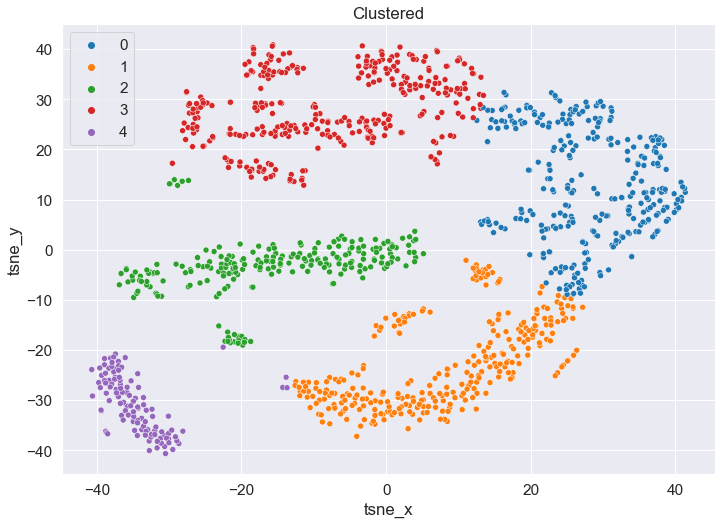

In [88]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.4)
sns.scatterplot(x="tsne_x", y="tsne_y", hue=df_prep["label"].tolist(),
                palette=sns.color_palette("tab10", 5),
                data=df_clustered).set(title="Clustered")

In [89]:
df_all = pd.read_csv("../cleaned_data/Final_Education_Fairness.csv")
df_all[["unitid", "institution_type"]].drop_duplicates().institution_type.value_counts()

Private for-profit        3642
Public                    2023
Private not-for-profit    1833
Name: institution_type, dtype: int64

In [90]:
# assign values to those not existing in old data
df_all = df_all.drop(columns=["Unnamed: 0"]).merge(df_prep[["unitid", "label"]], on="unitid", how="left")

In [91]:
df_all["label"].value_counts()

3.0    1928
0.0    1813
1.0    1791
2.0    1315
4.0     643
Name: label, dtype: int64

In [92]:
dic = {"Public":1, "Private not-for-profit":2, "Private for-profit": 3, np.nan: -1}
df_knn = df_all[~df_all["label"].isna()]
df_knn["institute"] = df_knn["institution_type"].map(dic)
df_knn = df_knn.fillna(-1)

<ipython-input-92-168efc156591>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn["institute"] = df_knn["institution_type"].map(dic)


In [93]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(df_knn.drop(columns=["label", "institution_type", "year", 'unitid']), df_knn["label"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [94]:
df_knn.drop(columns=["label", "institution_type", "year", 'unitid']).columns

Index(['Gini_gender', 'Gini_ethnics', 'Gini_income', 'edu_fairness_score',
       'institute'],
      dtype='object')

In [95]:
# for missing values
def get_closest(row):
    institute = dic[row["institution_type"]]
    row = row.fillna(0)
    ftrs = list(row[['Gini_gender', 'Gini_ethnics', 'Gini_income', 'edu_fairness_score']].values)
    return neigh.predict([ftrs + [institute]])

In [96]:
for idx, row in df_all.iterrows():
    if np.isnan(row["label"]):
        df_all.at[idx, "label"] = get_closest(row)

In [100]:
df_all.label.value_counts()

1.0    18044
3.0    14347
0.0     5679
2.0     1592
4.0      643
Name: label, dtype: int64

In [98]:
df_labels = df_all[["unitid", "year", "label"]].drop_duplicates()

In [99]:
df_labels[df_labels["unitid"] == 100654]

,unitid,year,label
0,100654,2020,3.0
6200,100654,2019,3.0
12505,100654,2018,3.0
19111,100654,2017,3.0
25944,100654,2016,3.0
32939,100654,2015,3.0


In [338]:
df_labels.to_csv('../cleaned_data/match_label.csv') 